In [1]:
# Linear models make a prediction using a linear function of the input features.
# Linear models for regression: ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

In [2]:
# Linear models for regression can be characterized as regression models for which the prediction is a line for a single feature, a plane when using two features, or a hyper‐
# plane in higher dimensions (that is, when using more features).

In [3]:
import mglearn
import matplotlib.pyplot as plt

w[0]: 0.393906  b: -0.031804


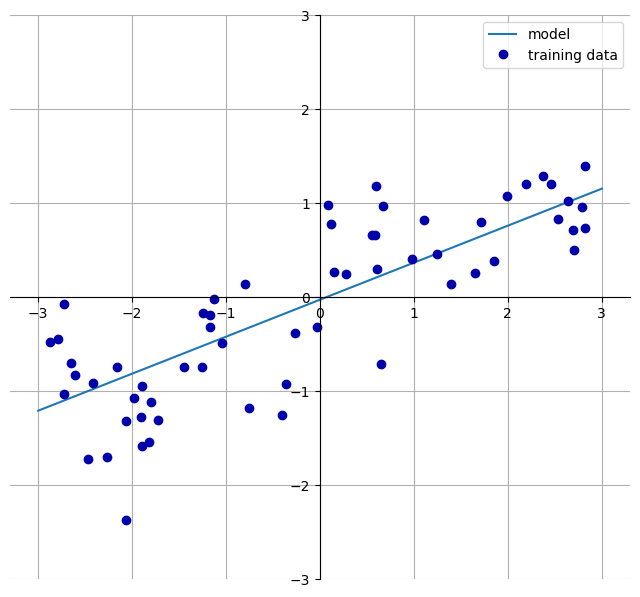

In [4]:
mglearn.plots.plot_linear_regression_wave()

In [5]:
# Linear Regression (Ordinary Least Square)
from sklearn.linear_model import LinearRegression

In [6]:
X,y = mglearn.datasets.make_wave(n_samples=60)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [9]:
lr = LinearRegression().fit(X_train,y_train)

In [10]:
print(lr.coef_)
print(lr.intercept_)

[0.39390555]
-0.031804343026759746


In [11]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.6700890315075756
0.65933685968637


In [12]:
# Trying for larger datasets
X,y = mglearn.datasets.load_extended_boston()

C:\Users\Subhu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [14]:
lr = LinearRegression().fit(X_train,y_train)

In [15]:
print(lr.score(X_train,y_train))

0.9520519609032729


In [16]:
print(lr.score(X_test,y_test))

0.6074721959665752


In [17]:
# Ridge Regression

In [18]:
# Regularization means to explicitly restriciting model to avoid overfitting
# Ridge regression also known as linear model of regression, chooses w value in such a way that features have less effect on prediction
from sklearn.linear_model import Ridge

In [19]:
ridge = Ridge().fit(X_train,y_train)

In [20]:
print(ridge.score(X_train,y_train))

0.885796658517094


In [21]:
print(ridge.score(X_test,y_test))

0.7527683481744755


In [22]:
# So as we can see it avoided overfitting when it is compared to our normal linear regression

In [23]:
# We can set a alpha value in ridge. Alpha value is the tuning parameter for our Ridge algorithm.
# Once we increase our aplha value, we are forcing the value of w to be more towards zero and lowering them means lest restriction
# When we have lower alpha value it is same as linear regression
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))


Training set score: 0.93
Test set score: 0.77


C:\Users\Subhu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

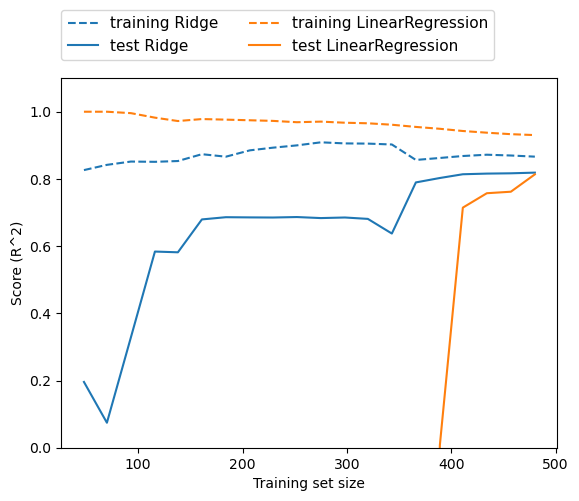

In [24]:
mglearn.plots.plot_ridge_n_samples()

In [25]:
# This shows that eventually for the larger datasets, both ridge and linear regression catch up against each other. 
# For small datasets we can see ridge out performs linear regression as we can tune our algorithm with the help of alpha parameter
# Regularization is important as it avoids overfitting. 
# With enough training dataset, regularization becomes less importance and both the algorithm have similar performance.


In [26]:
# Lasso
# This is alternative of ridge and works in similar way.
# The differennce is that it uses L1 regularization. It can tune some coefficient to exact zero.
# this means some of the features are completely ignored
# This helps to demostrate more important features and ignore the less important features.

In [27]:
from sklearn.linear_model import Lasso

In [28]:
lasso = Lasso().fit(X_train,y_train)

In [29]:
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.29323768991114607
0.20937503255272294


In [30]:
import numpy as np
print(np.sum(lasso.coef_!=0))

4


In [31]:
# This shows that only 4 features were used during our model training
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [32]:
# The difference with ridge is that, ridge never makes coeff zero. We always prefer ridge between these two models.
# If we have large number of features and we only expect to use minimum features, then lasso is best.

In [33]:
# Linear models for classification
# ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0
# Classification also works in similar formula as regression but the difference is we threshold values at 0
# Incase of regression, the output is a line, plane or hyperplane which is a linear function but inclase of classfication
# It is a decision boundary between classes.

C:\Users\Subhu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\Subhu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


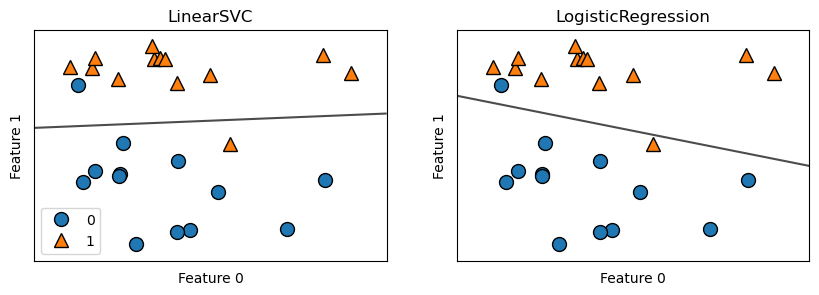

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
 clf = model.fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
 ax=ax, alpha=.7)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{}".format(clf.__class__.__name__))
 ax.set_xlabel("Feature 0")
 ax.set_ylabel("Feature 1")
axes[0].legend()


In [35]:
# the tuning parameter for linear classification is c which is used for regularization
# higher value of C = try to fit as best as possible
# lower value of C = coef of w close to zero. It follows L2 regulariaztaion like ridge

In [36]:
from sklearn.datasets import load_breast_cancer

In [37]:
cancer = load_breast_cancer()

In [38]:
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target,random_state=42)

In [39]:
logreg = LogisticRegression().fit(X_train,y_train)

C:\Users\Subhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
logreg.score(X_train,y_train)

0.9460093896713615

In [41]:
logreg.score(X_test,y_test)

0.965034965034965

In [43]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)


C:\Users\Subhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.958041958041958

In [45]:
print(logreg100.score(X_train,y_train))
print(logreg100.score(X_test,y_test))

0.9507042253521126
0.958041958041958


In [46]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))


Training set score: 0.937
Test set score: 0.930


C:\Users\Subhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
# The relationship between alpha and C is simply that C is the inverse of alpha, or C = 1/alpha. Therefore, a smaller value of C corresponds to a stronger regularization penalty, similar to a larger value of alpha in Ridge regression.

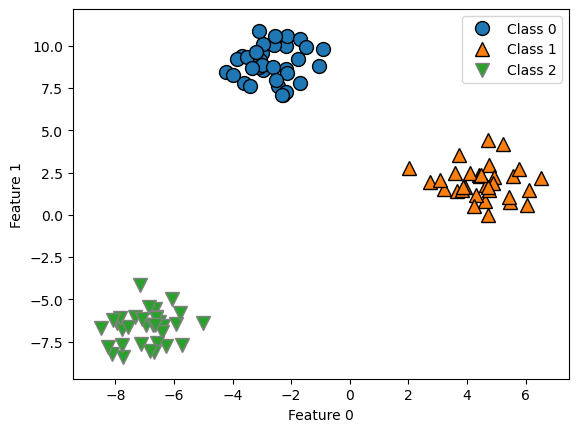

In [48]:
# Linear models for multiclass classifciation
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [54]:
# In multimodel classification, OvR approach is taken. If we are predicting for A,B and C, there will be a decioision boundary
# for A vs Band C, B vs A and C and C vs Aand B. According to the confidence score, a data point is classified.

In [55]:
# Naive Byes Classifier

In [ ]:
# This classifier is more efficient than linear. There are three kind of NB classifier in scikit learn:
# Gaussian NB, Bernolli NB and Multinomial NB
# Gaussian NB are normally used in continous data, Bernolli NB are used of binary and multinomial are used for